In [1]:
#import brightway2 as bw
import os               
import numpy as np       
import pandas as pd     
import time
#from brightway2 import *
#from bw_recipe_2016 import add_recipe_2016
#import bw2analyzer as bwa
#import stats_arrays
import matplotlib.pyplot as plt
import sys
import statistics as stat
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Modules')
import quickLCAinput as qlca
from quickLCAinput import *

### load all dataframe

In [2]:
#this file has seperated production names to three cols,
lca_calced = pd.read_excel (r'eidb_cutoff_over3uniprod_LCAcalced.xlsx') 
lca_calced

,Activity,LOC,Uniq_refprod,GWP,ISIC
0,linseed production,RU,linseed,1.097359,"0111:Growing of cereals (except rice), legumin..."
1,linseed production,RoW,linseed,1.151108,"0111:Growing of cereals (except rice), legumin..."
2,linseed production,CA,linseed,1.017564,"0111:Growing of cereals (except rice), legumin..."
3,"maize grain, feed production",CA-QC,"maize grain, feed",0.540308,"0111:Growing of cereals (except rice), legumin..."
4,"maize grain, feed production",ZA,"maize grain, feed",0.608762,"0111:Growing of cereals (except rice), legumin..."
...,...,...,...,...,...
5275,"natural gas, high pressure, import from RU",PL,"natural gas, high pressure",0.631936,various_ISIC
5276,"natural gas, high pressure, import from GB",CH,"natural gas, high pressure",0.078267,various_ISIC
5277,"natural gas, high pressure, import from GB",DK,"natural gas, high pressure",0.060166,various_ISIC
5278,"petroleum and gas production, off-shore",NO,"natural gas, high pressure",0.068594,various_ISIC


In [3]:
#this df has the same output as "final_df" from LCAcalced.ipynb, used for ploting (combined prod names for x_label)
lca_calced_allname = pd.read_excel (r'eidb_cutoff_over3uniprod_LCAcalced_combProdName.xlsx', index_col=0) 
lca_calced_allname

,"('IPCC 2013', 'climate change', 'GWP 100a')",ISIC
linseed production; loc:RU; ref.prod:linseed,1.097359,"0111:Growing of cereals (except rice), legumin..."
linseed production; loc:RoW; ref.prod:linseed,1.151108,"0111:Growing of cereals (except rice), legumin..."
linseed production; loc:CA; ref.prod:linseed,1.017564,"0111:Growing of cereals (except rice), legumin..."
"maize grain, feed production; loc:CA-QC; ref.prod:maize grain, feed",0.540308,"0111:Growing of cereals (except rice), legumin..."
"maize grain, feed production; loc:ZA; ref.prod:maize grain, feed",0.608762,"0111:Growing of cereals (except rice), legumin..."
...,...,...
"natural gas, high pressure, import from RU; loc:PL; ref.prod:natural gas, high pressure",0.631936,various_ISIC
"natural gas, high pressure, import from GB; loc:CH; ref.prod:natural gas, high pressure",0.078267,various_ISIC
"natural gas, high pressure, import from GB; loc:DK; ref.prod:natural gas, high pressure",0.060166,various_ISIC
"petroleum and gas production, off-shore; loc:NO; ref.prod:natural gas, high pressure",0.068594,various_ISIC


In [4]:
#this file refers to output as "uniq_final_df" from LCAcalced.ipynb, 740 unique ref. prod,  with COV 
lca_uniq_final_df = pd.read_excel (r'eidb_cutoff_over3_740uniprod_finalLCAcalced_wh_COV.xlsx')
lca_uniq_final_df

,ISIC,uniq_RefProd,#diff_prod,COV
0,"0111:Growing of cereals (except rice), legumin...",linseed,3,0.061721
1,"0111:Growing of cereals (except rice), legumin...","maize grain, feed",3,0.061193
2,"0111:Growing of cereals (except rice), legumin...",oat grain,4,0.195628
3,"0111:Growing of cereals (except rice), legumin...",peanut,4,0.599420
4,"0111:Growing of cereals (except rice), legumin...",protein pea,4,0.657398
...,...,...,...,...
735,various_ISIC,"protein feed, 100% crude",46,0.900857
736,various_ISIC,municipal solid waste,49,-0.400852
737,various_ISIC,"inorganic nitrogen fertiliser, as N",54,0.511783
738,various_ISIC,hard coal ash,61,-2.771861


### select a ref. product to barplot all its production route

<AxesSubplot:>

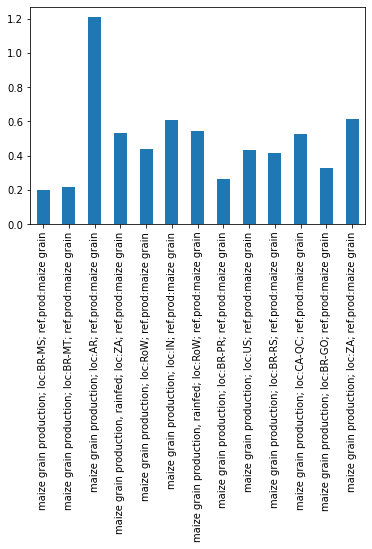

In [5]:
#first get row_index from the 5280rows of your selected product: below using maize grain as example
rid = lca_calced.index[lca_calced.Uniq_refprod == 'maize grain']
lca_calced_allname.loc[lca_calced_allname.index[rid]].plot.bar(legend = False)

### Select & process on key uniq. ref prod with highest COV

In [6]:
# first 50 highest positive COV, then order by ISIC:
uniq_first50 = lca_uniq_final_df.sort_values(['COV'], ascending=False)[0:50]
uniq_first50.sort_values(['ISIC'])

,ISIC,uniq_RefProd,#diff_prod,COV
13,"0113:Growing of vegetables and melons, roots a...",aubergine,3,1.566551
21,0114:Growing of sugar cane,sugarcane,9,1.517831
70,0161:Support activities for crop production,"organo-mineral phosphorus fertiliser, as P2O5",4,2.000000
81,0161:Support activities for crop production,"organic nitrogen fertiliser, as N",15,2.063243
83,0161:Support activities for crop production,"organic phosphorus fertiliser, as P2O5",16,2.069369
80,0161:Support activities for crop production,"organo-mineral potassium fertiliser, as K2O",5,2.235129
69,0161:Support activities for crop production,"organo-mineral nitrogen fertiliser, as N",4,2.000000
82,0161:Support activities for crop production,"organic potassium fertiliser, as K2O",15,2.391605
90,0163:Post-harvest crop activities,drying of feed grain,3,1.388522
104,0311:Marine fishing,"landed anchovy, fresh",4,1.684346


see what ISIC for the first 100 highest positive COV

In [7]:
uniq_first100 = lca_uniq_final_df.sort_values(['COV'], ascending=False)[0:100]
#uniq_first100

In [8]:
first100ISIC = uniq_first100.ISIC.unique()  #35 diff. ISIC categories 
first100ISIC

array(['68:Real estate activities', 'various_ISIC',
       '0161:Support activities for crop production',
       '1920:Manufacture of refined petroleum products',
       '3600:Water collection, treatment and supply',
       '2420:Manufacture of basic precious and other non-ferrous metals',
       '0311:Marine fishing',
       '0113:Growing of vegetables and melons, roots and tubers',
       '0114:Growing of sugar cane', '0163:Post-harvest crop activities',
       '2394:Manufacture of cement, lime and plaster',
       '1313:Finishing of textiles',
       '3821:Treatment and disposal of non-hazardous waste',
       '3830:Materials recovery',
       '19a: Liquid and gaseous fuels from biomass',
       '0510:Mining of hard coal',
       '4220a: Construction of utility projects for electricity production, except for liquid fuels',
       '1312:Weaving of textiles', '0123:Growing of citrus fruits',
       '2011:Manufacture of basic chemicals',
       '0610:Extraction of crude petroleum',
   

In [9]:
for first100 in first100ISIC:
    print(first100, list(uniq_first100.ISIC).count(first100))

68:Real estate activities 7
various_ISIC 38
0161:Support activities for crop production 7
1920:Manufacture of refined petroleum products 6
3600:Water collection, treatment and supply 1
2420:Manufacture of basic precious and other non-ferrous metals 3
0311:Marine fishing 1
0113:Growing of vegetables and melons, roots and tubers 2
0114:Growing of sugar cane 1
0163:Post-harvest crop activities 2
2394:Manufacture of cement, lime and plaster 1
1313:Finishing of textiles 1
3821:Treatment and disposal of non-hazardous waste 2
3830:Materials recovery 1
19a: Liquid and gaseous fuels from biomass 3
0510:Mining of hard coal 1
4220a: Construction of utility projects for electricity production, except for liquid fuels 1
1312:Weaving of textiles 1
0123:Growing of citrus fruits 1
2011:Manufacture of basic chemicals 9
0610:Extraction of crude petroleum 1
0126:Growing of oleaginous fruits 1
2011a: Manufacture of nuclear fuels 3
0125:Growing of other tree and bush fruits and nuts 2
3510:Electric power g

last 118 lines are ref. prod. with negative GWP

In [10]:
uniq_negGWP = lca_uniq_final_df.sort_values(['COV'], ascending=False).tail(118)
uniq_negGWP

,ISIC,uniq_RefProd,#diff_prod,COV
458,3821:Treatment and disposal of non-hazardous w...,"waste polystyrene isolation, flame-retardant",3,-0.001065
461,3821:Treatment and disposal of non-hazardous w...,"waste sealing sheet, polyethylene",3,-0.004881
499,3822:Treatment and disposal of hazardous waste,"hazardous waste, for incineration",6,-0.005122
454,3821:Treatment and disposal of non-hazardous w...,waste expanded polystyrene,3,-0.005579
450,3821:Treatment and disposal of non-hazardous w...,waste bitumen sheet,3,-0.006870
...,...,...,...,...
716,various_ISIC,lignite ash,18,-2.000351
657,various_ISIC,used tyre,6,-2.449490
738,various_ISIC,hard coal ash,61,-2.771861
478,3821:Treatment and disposal of non-hazardous w...,waste glass,16,-3.131369


In [11]:
NEG_ISIC = uniq_negGWP.ISIC.unique()  #eight diff. ISIC categories 

In [12]:
for negGWP in NEG_ISIC:
    print(negGWP, list(uniq_negGWP.ISIC).count(negGWP))

3821:Treatment and disposal of non-hazardous waste 58
3822:Treatment and disposal of hazardous waste 10
3700:Sewerage 2
various_ISIC 43
3830:Materials recovery 3
382:Waste treatment and disposal 1
68:Real estate activities 1


###  plotting within-product var. for selected key ref. prod 

In [13]:
#df_uniqprod is the df of unique ref. product (740 rows), its 'df_uniqprod_refprod_col' to compare same ref. prod from df_allprod
#df_allprod is the df of all product (each uniq. ref. has multiple >=3, total 5280 rows), 
#after compare the two 'col', row_index of df_allprod for each uniq. prod is obtained, used for barplot all production route for each uniq.prod
def get_fullprod_rid(df_uniqprod, df_uniqprod_refprod_col, df_allprod, df_allprod_refprod_col): 
    uniq_index = [{}]*len(df_uniqprod) #create empty list of dict to store {uniq_ref_prod_name:row_indexfromALLprod}
    i = -1                             #indexing uniq_index
    for uniq in df_uniqprod[df_uniqprod_refprod_col]: 
        i  += 1
        for prodx in df_allprod[df_allprod_refprod_col]:
            if uniq in prodx:
                uniq_rid = df_allprod.index[df_allprod[df_allprod_refprod_col] == uniq]
                uniq_index[i] = {uniq:uniq_rid}
    return (uniq_index)

get full row_index for the first 50 ref.product with highest COV, or first 100, or all 740 unique ref. prod, or other user-defined 

In [14]:
uniq_first50_sortISIC = uniq_first50.sort_values(['ISIC'])
uniq_first50_sortISIC

,ISIC,uniq_RefProd,#diff_prod,COV
13,"0113:Growing of vegetables and melons, roots a...",aubergine,3,1.566551
21,0114:Growing of sugar cane,sugarcane,9,1.517831
70,0161:Support activities for crop production,"organo-mineral phosphorus fertiliser, as P2O5",4,2.000000
81,0161:Support activities for crop production,"organic nitrogen fertiliser, as N",15,2.063243
83,0161:Support activities for crop production,"organic phosphorus fertiliser, as P2O5",16,2.069369
80,0161:Support activities for crop production,"organo-mineral potassium fertiliser, as K2O",5,2.235129
69,0161:Support activities for crop production,"organo-mineral nitrogen fertiliser, as N",4,2.000000
82,0161:Support activities for crop production,"organic potassium fertiliser, as K2O",15,2.391605
90,0163:Post-harvest crop activities,drying of feed grain,3,1.388522
104,0311:Marine fishing,"landed anchovy, fresh",4,1.684346


In [15]:
uniq_first50_sortISIC.ISIC.unique()

array(['0113:Growing of vegetables and melons, roots and tubers',
       '0114:Growing of sugar cane',
       '0161:Support activities for crop production',
       '0163:Post-harvest crop activities', '0311:Marine fishing',
       '0510:Mining of hard coal', '1313:Finishing of textiles',
       '1920:Manufacture of refined petroleum products',
       '19a: Liquid and gaseous fuels from biomass',
       '2394:Manufacture of cement, lime and plaster',
       '2420:Manufacture of basic precious and other non-ferrous metals',
       '3600:Water collection, treatment and supply',
       '3821:Treatment and disposal of non-hazardous waste',
       '3830:Materials recovery',
       '4220a: Construction of utility projects for electricity production, except for liquid fuels',
       '68:Real estate activities', 'various_ISIC'], dtype=object)

In [16]:
index50 = get_fullprod_rid(uniq_first50_sortISIC, 'uniq_RefProd', lca_calced, 'Uniq_refprod') 

In [17]:
index50

[{'aubergine': Int64Index([73, 74, 75], dtype='int64')},
 {'sugarcane': Int64Index([111, 112, 113, 114, 115, 116, 117, 118, 119], dtype='int64')},
 {'organo-mineral phosphorus fertiliser, as P2O5': Int64Index([345, 346, 347, 348], dtype='int64')},
 {'organic nitrogen fertiliser, as N': Int64Index([393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
              406, 407],
             dtype='int64')},
 {'organic phosphorus fertiliser, as P2O5': Int64Index([423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
              436, 437, 438],
             dtype='int64')},
 {'organo-mineral potassium fertiliser, as K2O': Int64Index([388, 389, 390, 391, 392], dtype='int64')},
 {'organo-mineral nitrogen fertiliser, as N': Int64Index([341, 342, 343, 344], dtype='int64')},
 {'organic potassium fertiliser, as K2O': Int64Index([408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
              421, 422],
             dtype='int64')},
 {'drying of feed grain': 

In [18]:
#len(index50)
#try ploting one product: 
plotid = list(index50[1].values())

<AxesSubplot:>

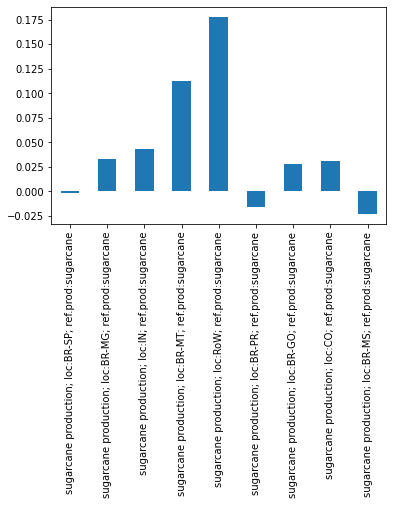

In [19]:
lca_calced_allname.loc[lca_calced_allname.index[plotid]].plot.bar(legend=False)

### seperate selected RP to diff. dataframe by ISIC, each ISIC with its own df, uniq RP

In [20]:
#seperate uniq_first50_sortISIC to [len=24] different dataframes, by ISIC
sep_uniq_first50_sortISIC = [[]] * len(uniq_first50_sortISIC.ISIC.unique())
i = -1
for uniq_ISIC in uniq_first50_sortISIC.ISIC.unique():
    i +=1
    #if uniq_first50_sortISIC.ISIC == uniq_ISIC:
    sep_uniq_first50_sortISIC[i] = uniq_first50_sortISIC[uniq_first50_sortISIC.ISIC == uniq_ISIC]

In [21]:
n = -1
for sort50 in sep_uniq_first50_sortISIC: 
    n +=1 
    print(sort50.ISIC)
    #print(n)

13    0113:Growing of vegetables and melons, roots a...
Name: ISIC, dtype: object
21    0114:Growing of sugar cane
Name: ISIC, dtype: object
70    0161:Support activities for crop production
81    0161:Support activities for crop production
83    0161:Support activities for crop production
80    0161:Support activities for crop production
69    0161:Support activities for crop production
82    0161:Support activities for crop production
Name: ISIC, dtype: object
90    0163:Post-harvest crop activities
Name: ISIC, dtype: object
104    0311:Marine fishing
Name: ISIC, dtype: object
108    0510:Mining of hard coal
Name: ISIC, dtype: object
152    1313:Finishing of textiles
Name: ISIC, dtype: object
234    1920:Manufacture of refined petroleum products
236    1920:Manufacture of refined petroleum products
221    1920:Manufacture of refined petroleum products
218    1920:Manufacture of refined petroleum products
235    1920:Manufacture of refined petroleum products
Name: ISIC, dtype: object


In [22]:
#  do not plot ISIC with too many diff_prod rount: 
# '68:Real estate activities': each with many diff_prod except "land use change, forest, intensive"
# using [N] printed above
sep_uniq_first50_sortISIC[15]

,ISIC,uniq_RefProd,#diff_prod,COV
552,68:Real estate activities,"land use change, annual crop",47,1.239588
555,68:Real estate activities,"land tenure, arable land, measured as carbon n...",150,1.422142
556,68:Real estate activities,"land tenure, arable land, measured as carbon n...",175,10.786375
549,68:Real estate activities,"land use change, forest, intensive",12,10.177446
553,68:Real estate activities,"land use change, perennial crop",53,4.301199
554,68:Real estate activities,"land tenure, arable land, measured as carbon n...",69,1.633375


In [23]:
# "3600:Water collection, treatment and supply": ref. prod'tap water';  
sep_uniq_first50_sortISIC[11]

,ISIC,uniq_RefProd,#diff_prod,COV
419,"3600:Water collection, treatment and supply",tap water,54,1.989341


In [24]:
index_sep_ISIC = [[]] * len(sep_uniq_first50_sortISIC)
for i in range(len(sep_uniq_first50_sortISIC)):
    index_sep_ISIC[i] = get_fullprod_rid(sep_uniq_first50_sortISIC[i], 'uniq_RefProd', lca_calced, 'Uniq_refprod') 

In [25]:
#for iii in index_sep_ISIC: 
#    print(iii)

In [26]:
#extract total number of diff. activity for top 50 unique RP: sum([len(x) for x in index50[i].values()]) 
#for i in range(len(index50)):
#    print(index50[i].keys(), sum([len(x) for x in index50[i].values()]) )

In [27]:
#delete those with too many diff_act: tap water, land use change
index50new = [iii for iii in index50 if  sum([len(x) for x in iii.values()]) <30 ]
len(index50new)

44

In [28]:
# see which ones have too many activity (won't be plotted)
index_6left = [iii for iii in index50 if  sum([len(x) for x in iii.values()]) >=30 ]
index_6left

[{'tap water': Int64Index([2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210,
              2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221,
              2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232,
              2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243,
              2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253],
             dtype='int64')},
 {'land use change, annual crop': Int64Index([2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008,
              3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019,
              3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030,
              3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041,
              3042, 3043, 3044],
             dtype='int64')},
 {'land tenure, arable land, measured as carbon net primary productivity, annual crop': Int64Index([3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174,

i=0
#original df:   lca_calced[lca_calced['Uniq_refprod'] == list(index50new[i].keys())[0] ]
#get ISIC per "uni_refprod":  lca_calced[lca_calced['Uniq_refprod'] == list(index50new[i].keys())[0] ].ISIC
#get final ISIC, used for plotting title
list(lca_calced[lca_calced['Uniq_refprod'] == list(index50new[i].keys())[0] ].ISIC)[0]  

For RP "aluminium scrap, post-consumer, prepared for melting", the ISIC title is "various/NA ISIC" instead of "various_ISIC" as shown for other RP produced under diff. ISIC,
this is because some activities that produced this RP are under ISIC "3830	Materials recovery", while there is also the activity "aluminium scrap, post-consumer, prepared for melting, Recycled Content cut-off", that does not have an applicable ISIC, this "Recycled Content cut-off" activity, however, was not deleted in initial dataset selection as it involves the RP "aluminium scrap, post-consumer, prepared for melting" that are produced by other applicable ISIC "3830	Materials recovery"

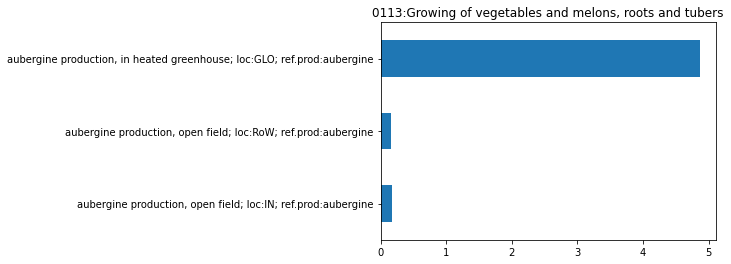

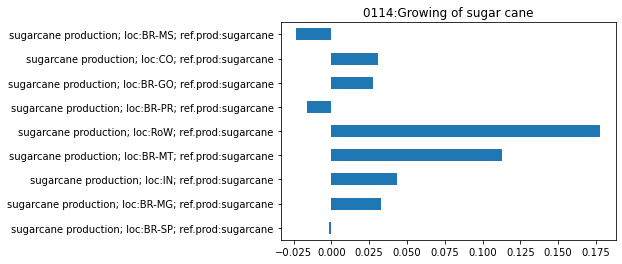

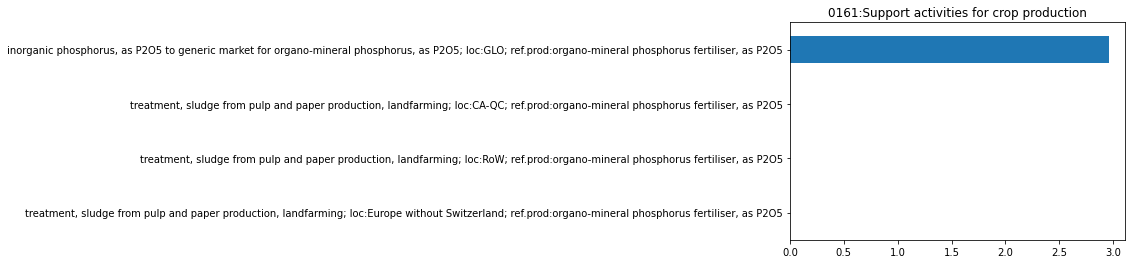

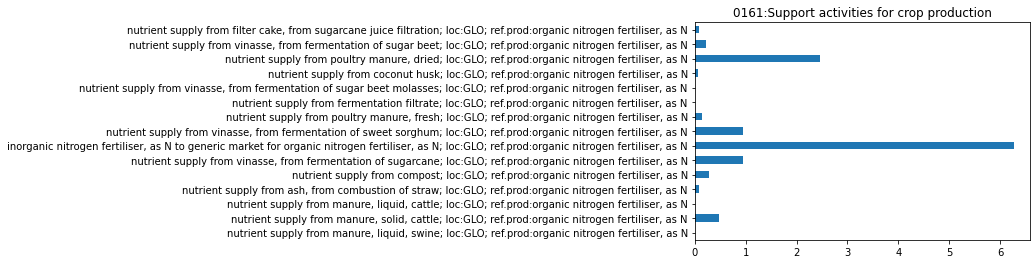

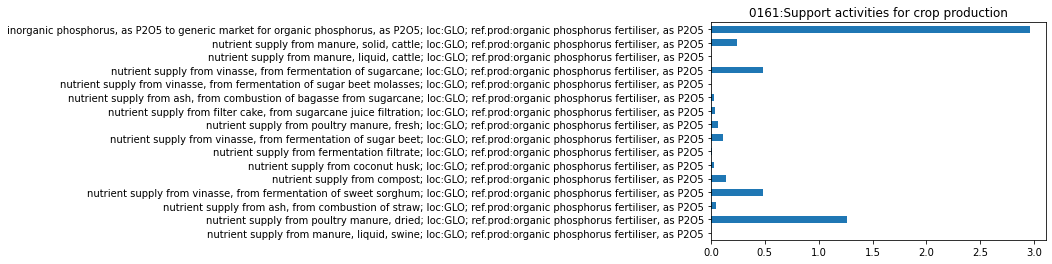

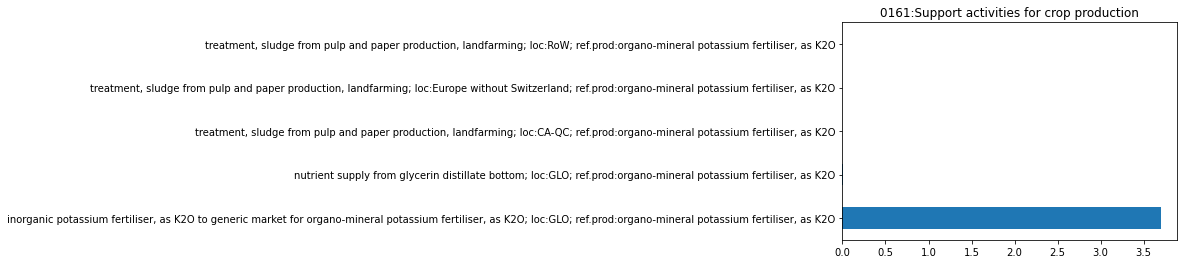

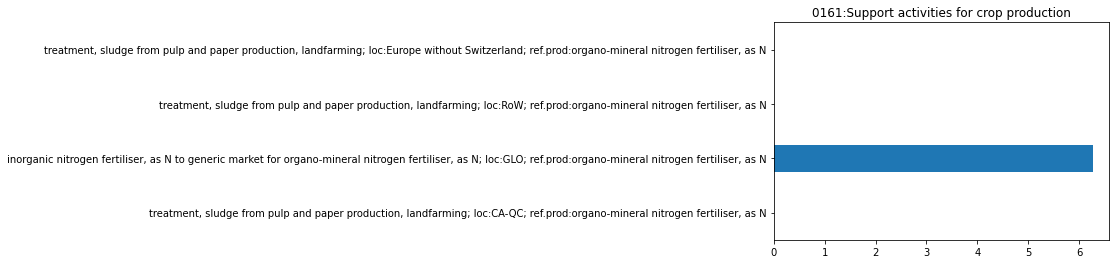

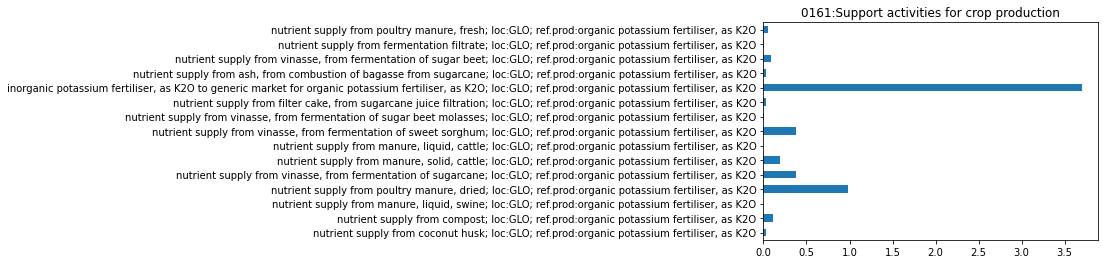

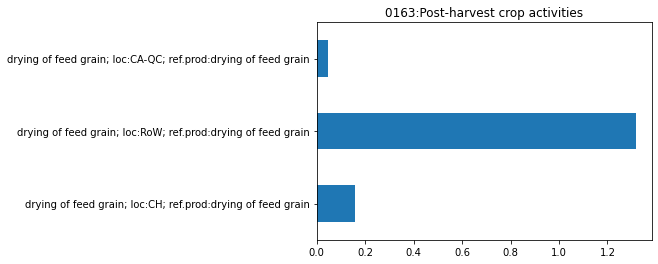

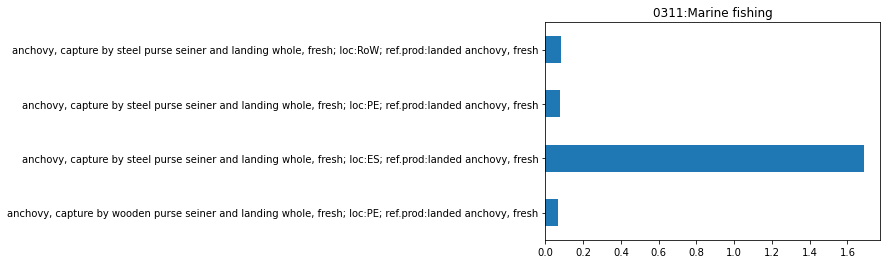

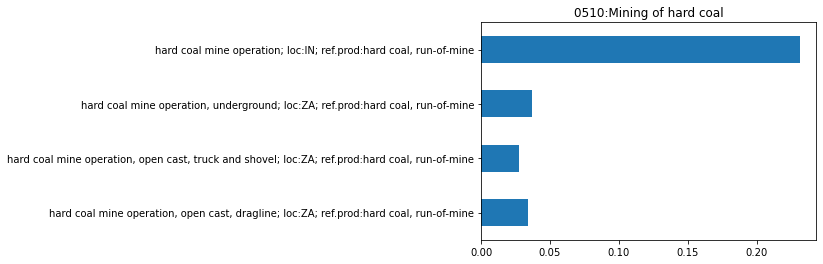

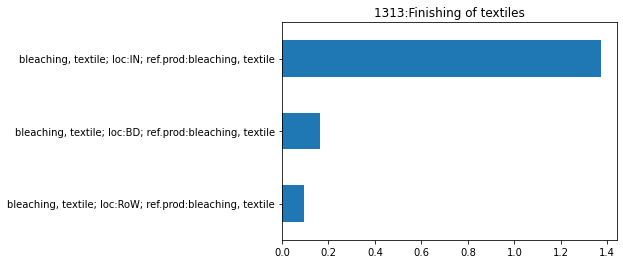

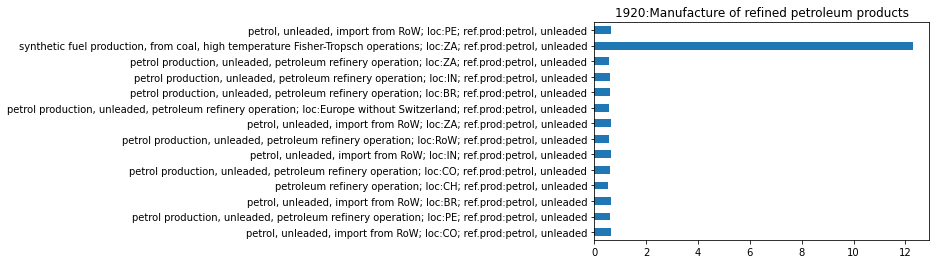

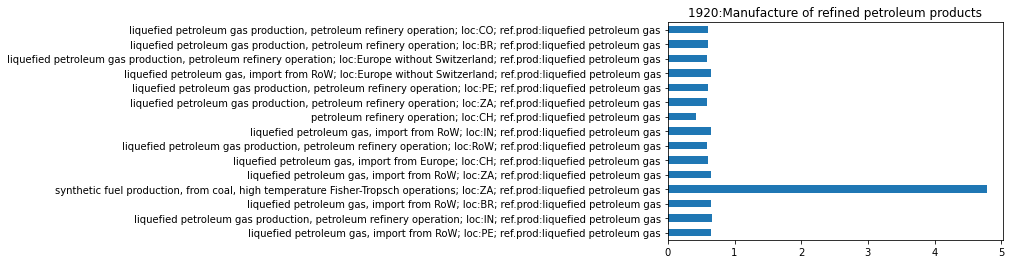

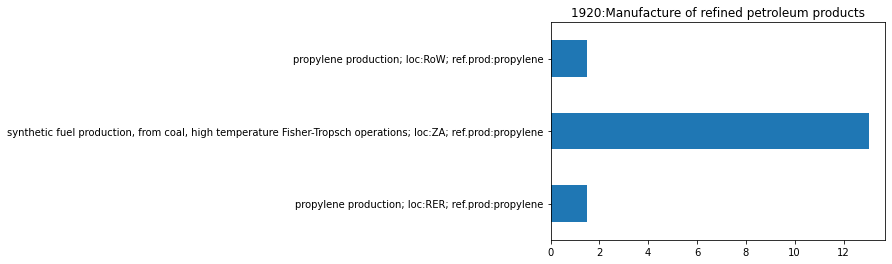

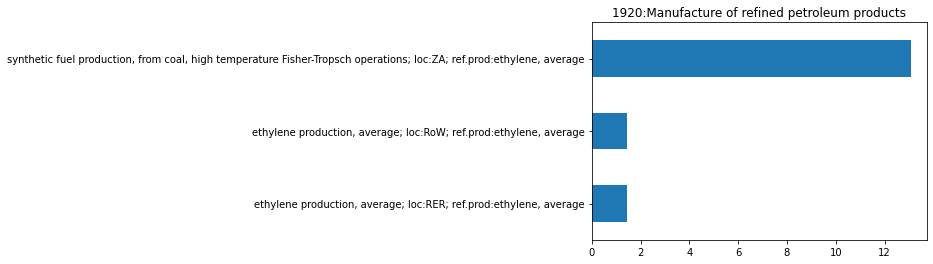

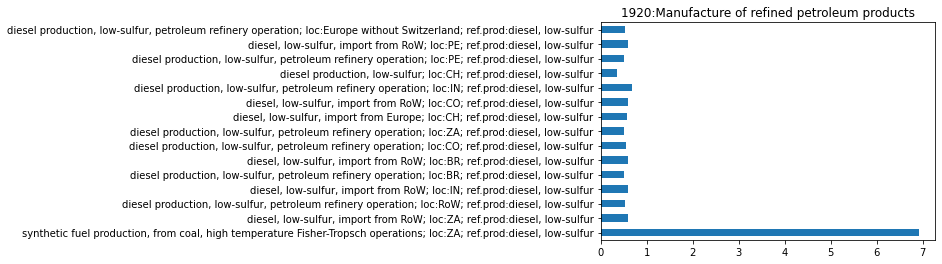

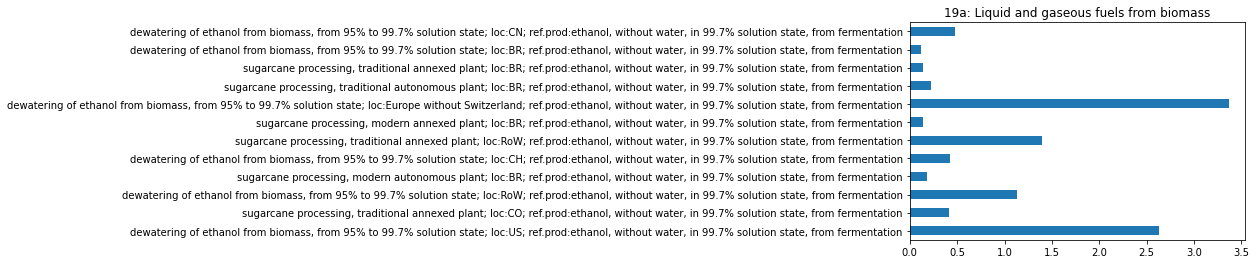

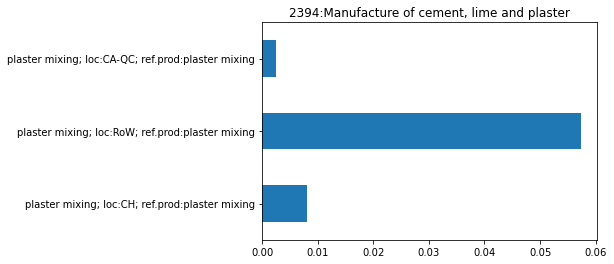

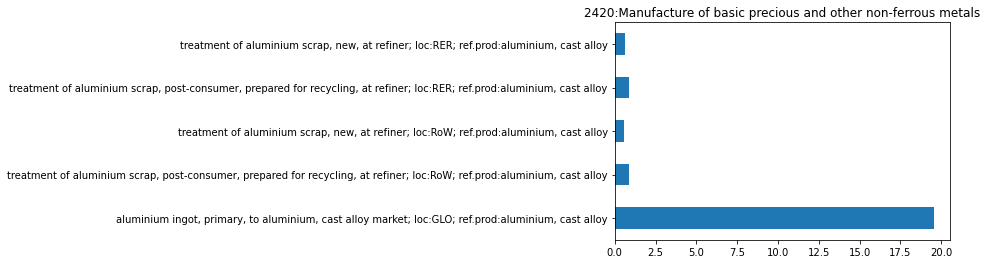

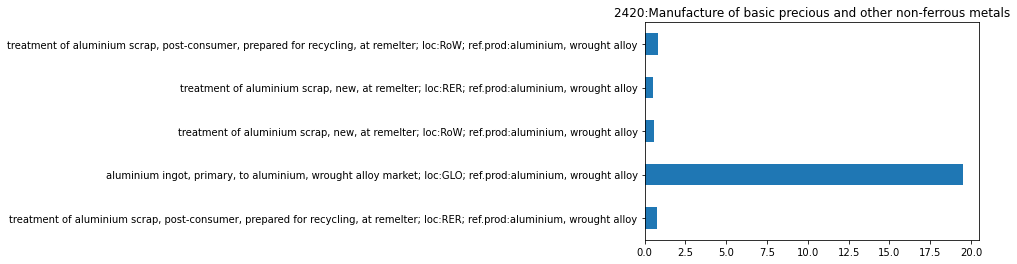

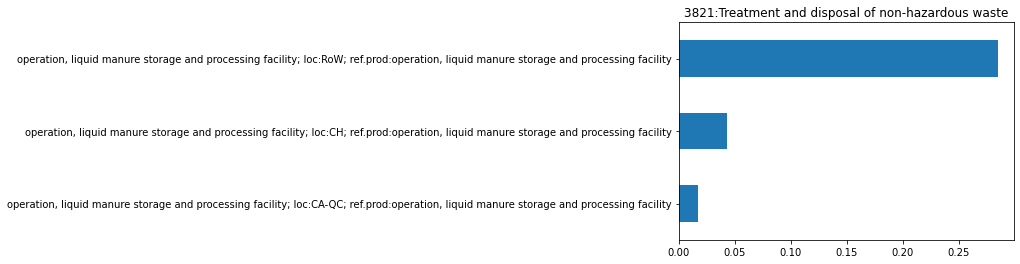

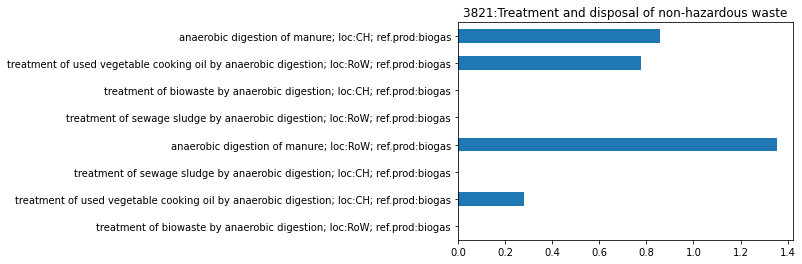

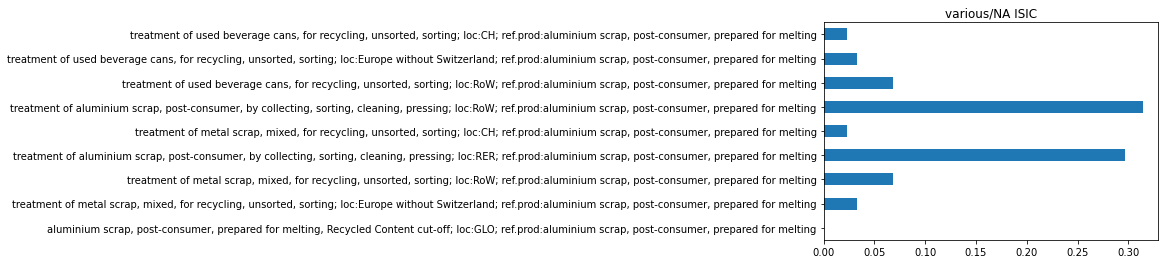

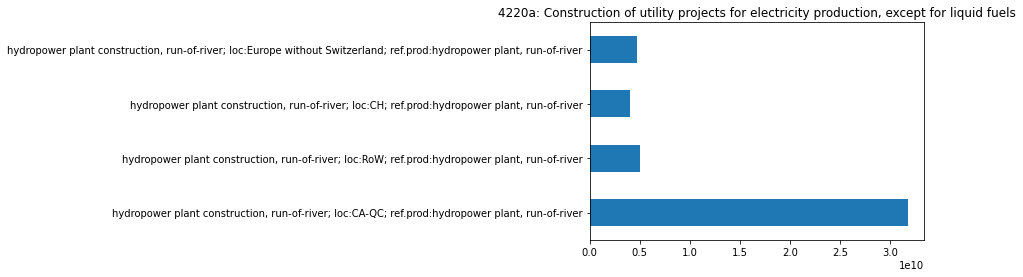

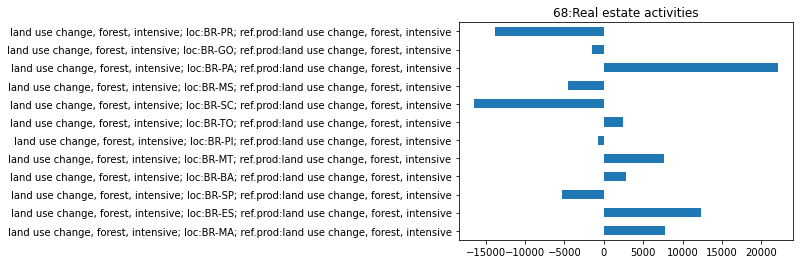

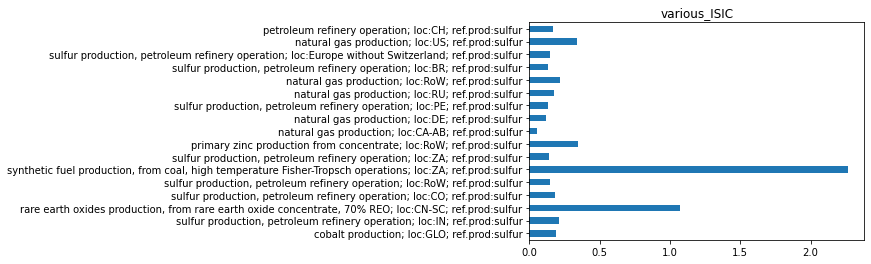

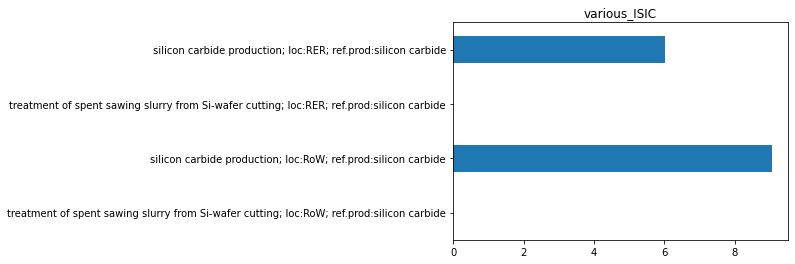

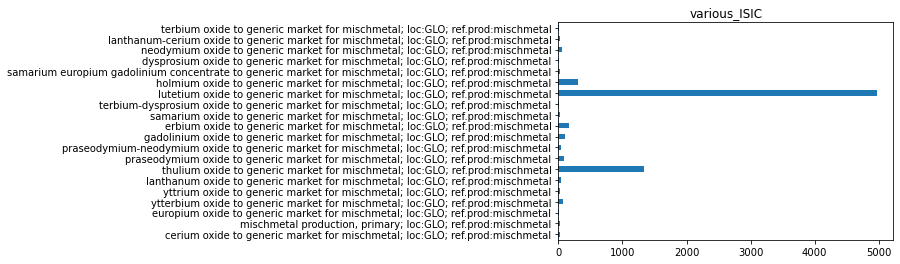

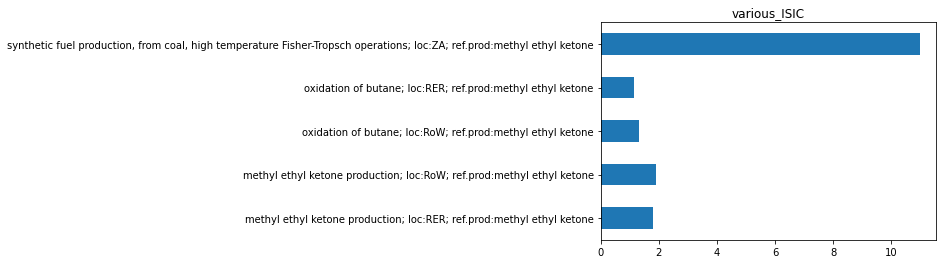

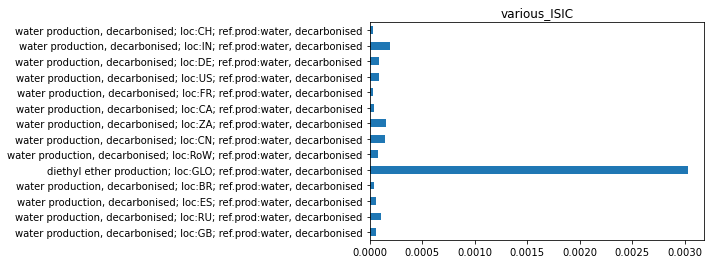

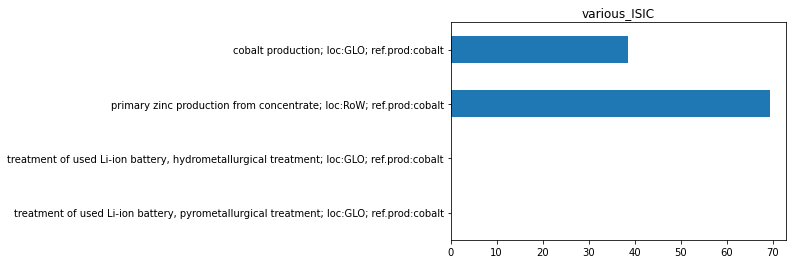

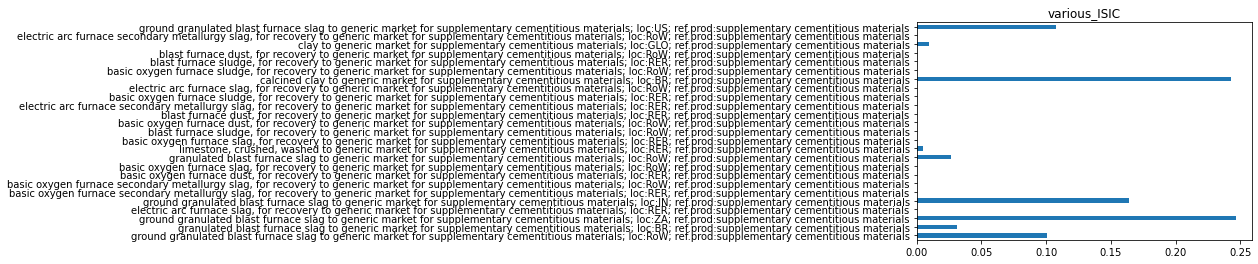

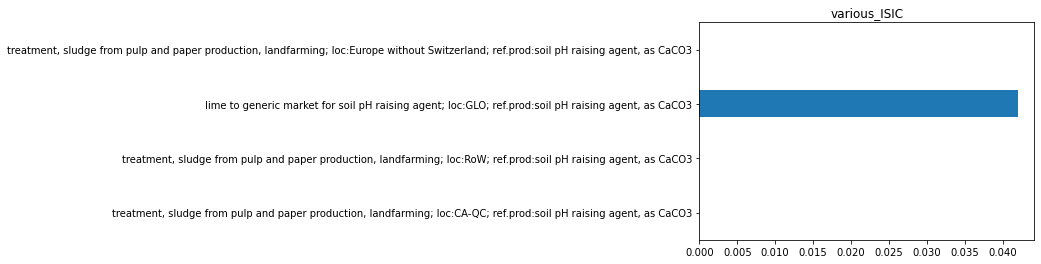

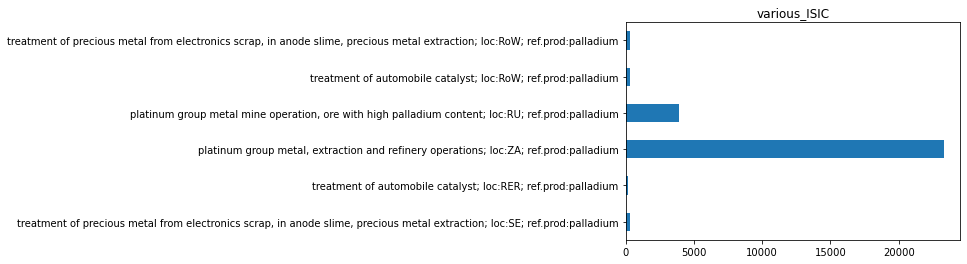

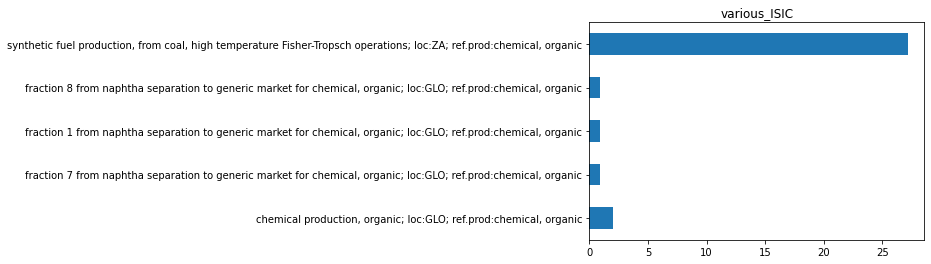

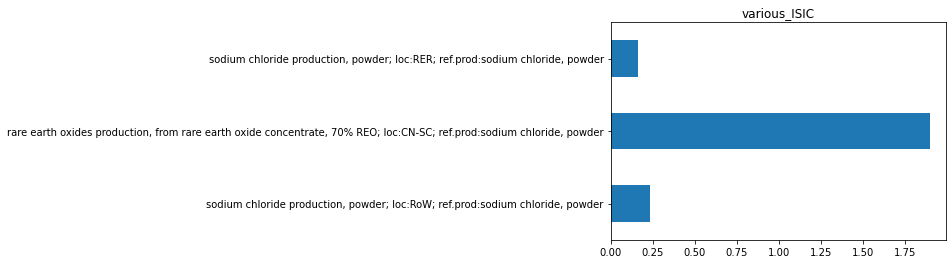

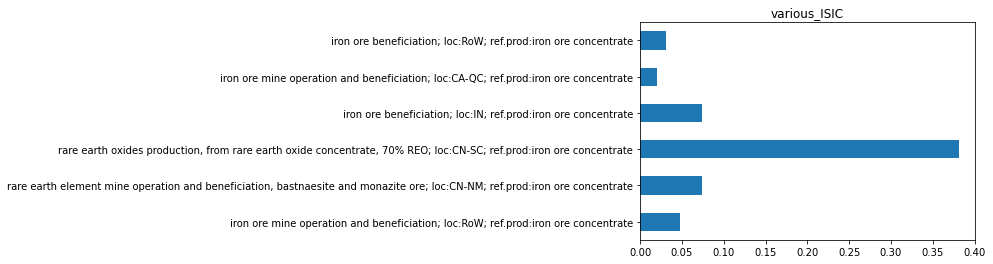

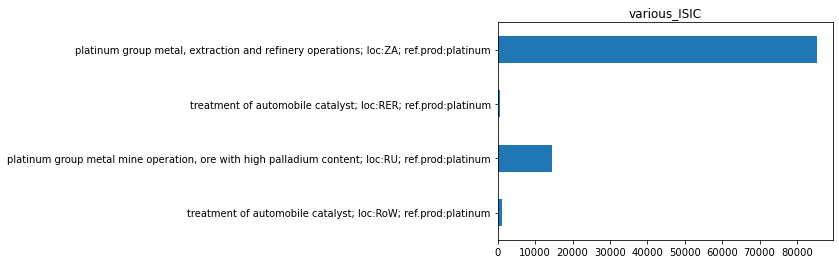

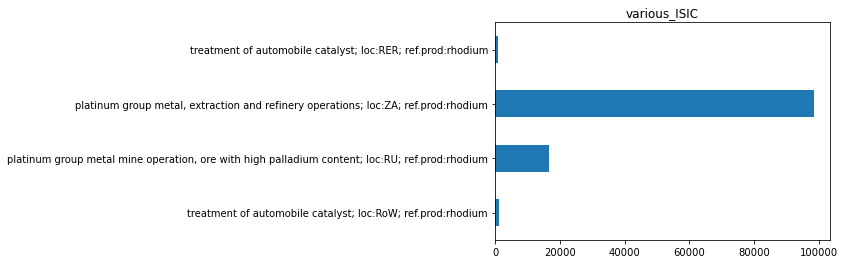

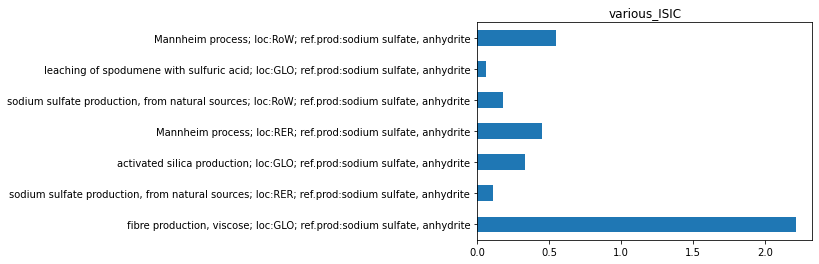

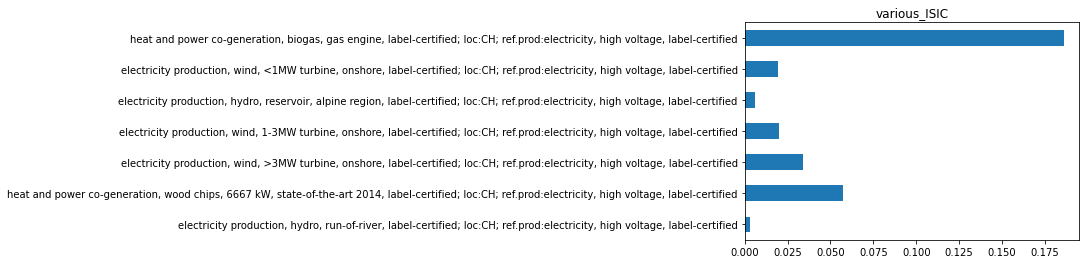

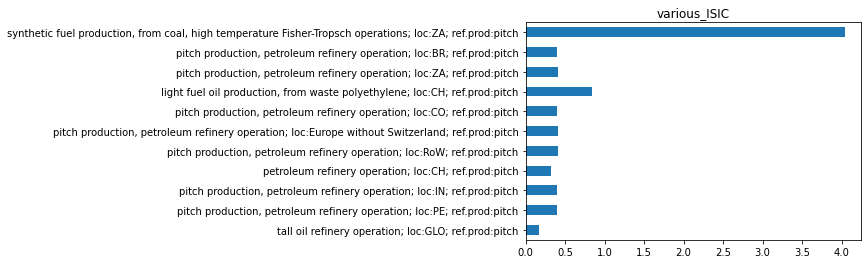

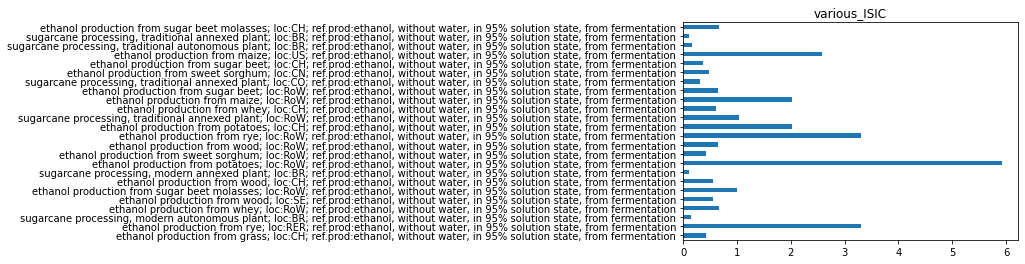

In [29]:
for i in range(len(index50new)):
    plotid =  list(index50new[i].values())
    d_p = lca_calced_allname.loc[lca_calced_allname.index[plotid]].drop(['ISIC'],axis =1)
    ref_p = d_p.index[0]
    p_title = ref_p.split("ref.prod:",1)[1]

    d_p.plot.barh(legend = False,
                  title = list(lca_calced[lca_calced['Uniq_refprod'] == list(index50new[i].keys())[0] ].ISIC)[0])
    plt.savefig('result_images/' + p_title +".png", bbox_inches="tight", dpi=300) 

### plot tap water seperately

<AxesSubplot:>

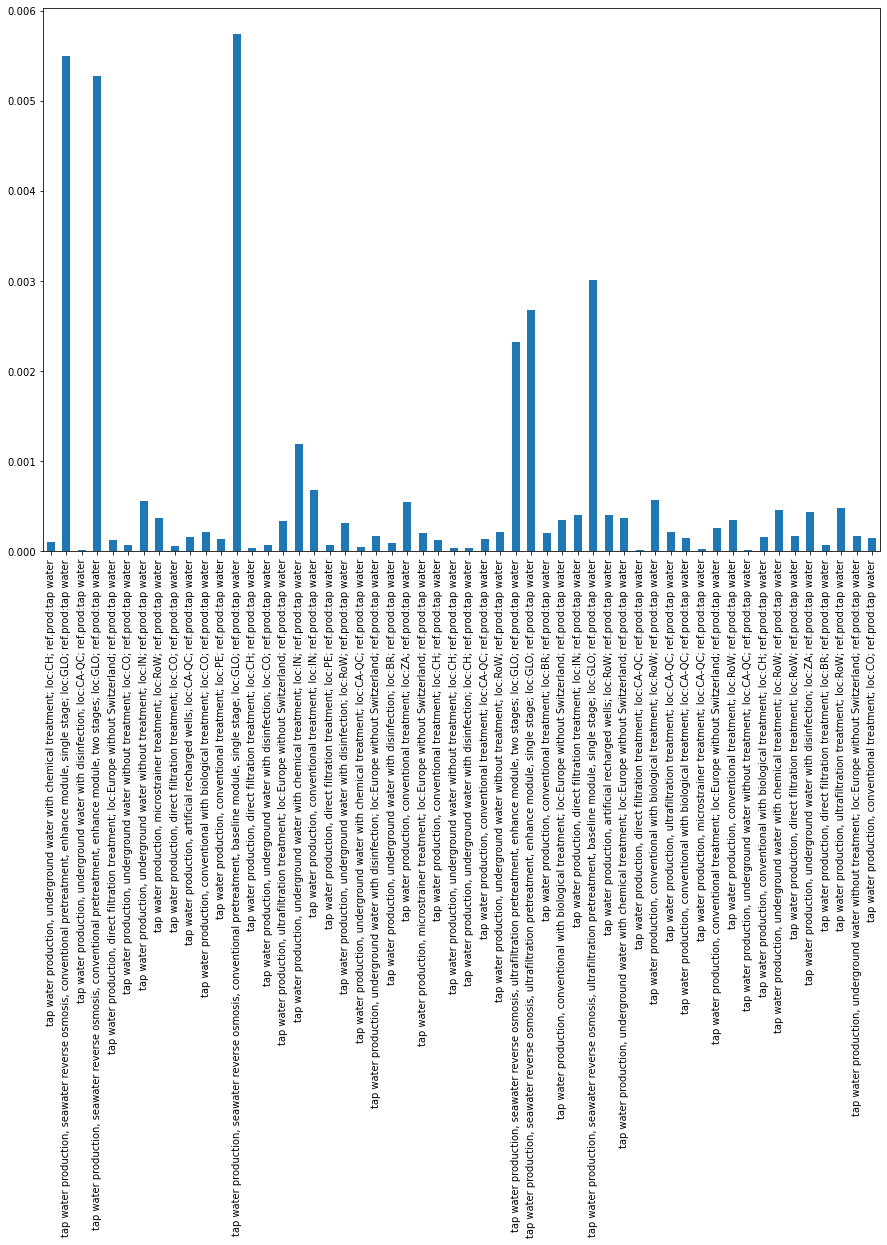

In [30]:
rid = lca_calced.index[lca_calced.Uniq_refprod == 'tap water']
lca_calced_allname.loc[lca_calced_allname.index[rid]].plot.bar(legend=False, figsize=(15,10))